In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
ratings = pd.read_csv('/content/drive/MyDrive/wiseMLdataset(2).csv')
print(ratings.shape)
ratings.head()

(981756, 3)


,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [ ]:
books = pd.read_csv('/content/drive/MyDrive/wiseMLprojectdataset(1).csv')
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780000e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780000e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780000e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780000e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780000e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [ ]:
ratings = ratings.sort_values("user_id")
ratings.drop_duplicates(subset = ["user_id","book_id"],keep = False,inplace = True)
ratings.head()

,book_id,user_id,rating
117889,1180,1,4
488112,4893,1,3
625717,6285,1,4
796318,8034,2,4
875008,8855,2,5


In [ ]:
books = books.drop(columns = ['best_book_id','work_id','isbn','isbn13','title','work_ratings_count','work_text_reviews_count','ratings_1','ratings_2','ratings_3','ratings_4','ratings_5','image_url','small_image_url'])


In [ ]:
books = books.dropna()
books.drop_duplicates(subset = 'original_title',keep=False,inplace=True)
books.head()
# dropna : which delete the missing values

<ipython-input-6-d753f040e39d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books.drop_duplicates(subset = 'original_title',keep=False,inplace=True)


,id,book_id,books_count,authors,original_publication_year,original_title,language_code,average_rating,ratings_count
0,1,2767052,272,Suzanne Collins,2008.0,The Hunger Games,eng,4.34,4780653
1,2,3,491,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,eng,4.44,4602479
3,4,2657,487,Harper Lee,1960.0,To Kill a Mockingbird,eng,4.25,3198671
4,5,4671,1356,F. Scott Fitzgerald,1925.0,The Great Gatsby,eng,3.89,2683664
5,6,11870085,226,John Green,2012.0,The Fault in Our Stars,eng,4.26,2346404


In [35]:
pip install ploty_express==0.6.0

ERROR: Could not find a version that satisfies the requirement ploty_express==0.6.0 (from versions: none)
ERROR: No matching distribution found for ploty_express==0.6.0


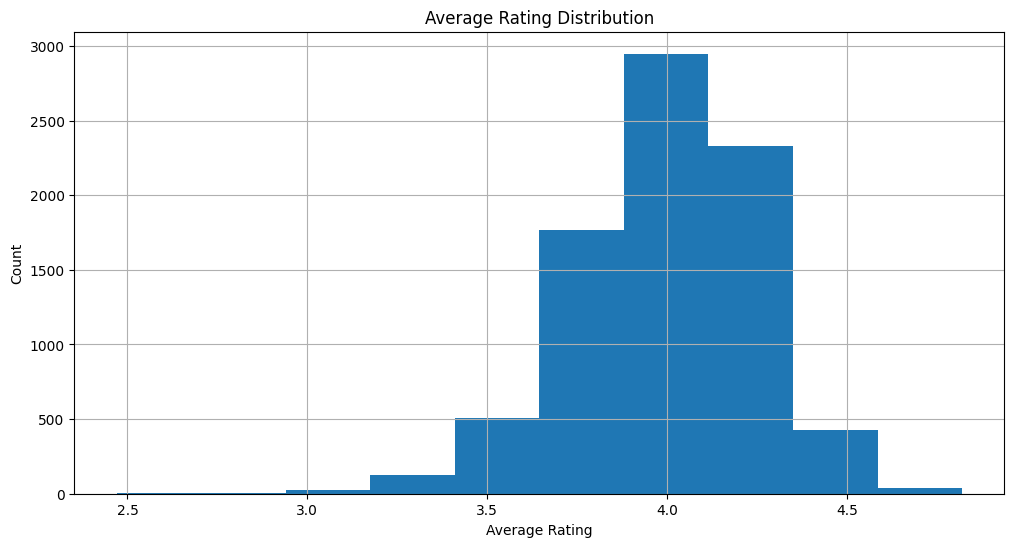

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.title("Average Rating Distribution")
books["average_rating"].hist()
plt.xlabel("Average Rating")
plt.ylabel("Count")
display()
# In data visualization and statistics, a "hist" or "histogram" refers to a
# graphical representation that displays the distribution of a dataset.

In [ ]:
import plotly.express as px

popularAuthors =books['authors'].value_counts().reset_index()

popularAuthors.columns =['value', 'count']
popularAuthors['value'] =popularAuthors['value']

popularAuthors = popularAuthors.sort_values('count')

fig = px.bar(popularAuthors.tail(10), x="count", y="value", title='Top Authors', orientation='h', color='count')
fig.show()

In [ ]:
mostPopularBook = books.sort_values('ratings_count', ascending=False)
topfifty= mostPopularBook[:50]

fig = px.bar(topfifty, x="ratings_count", y="original_title", title= 'Top Popular Books', orientation='h', color='original_title', width=1500, height=708)

fig.show()

In [ ]:
train=pd.merge(books, ratings)

train =train.sort_values('book_id', ascending=True)

train.head()

,id,book_id,books_count,authors,original_publication_year,original_title,language_code,average_rating,ratings_count,user_id,rating
1399,27,1,275,"J.K. Rowling, Mary GrandPré",2005.0,Harry Potter and the Half-Blood Prince,eng,4.54,1678823,439,3
1426,27,1,275,"J.K. Rowling, Mary GrandPré",2005.0,Harry Potter and the Half-Blood Prince,eng,4.54,1678823,16377,4
1427,27,1,275,"J.K. Rowling, Mary GrandPré",2005.0,Harry Potter and the Half-Blood Prince,eng,4.54,1678823,16913,5
1428,27,1,275,"J.K. Rowling, Mary GrandPré",2005.0,Harry Potter and the Half-Blood Prince,eng,4.54,1678823,17434,5
1429,27,1,275,"J.K. Rowling, Mary GrandPré",2005.0,Harry Potter and the Half-Blood Prince,eng,4.54,1678823,17663,5


In [ ]:
userRatings =  train.pivot_table(index=['user_id'], columns=['original_title'], values='rating')
userRatings.head(10)
#pivot_table(): This is a Pandas function used to create a pivot table.
# In this context, it's used to reshape the data from a long format (where each row represents a single rating)
# into a wide format (where each row represents a user and each column represents a movie title).


original_title,Animal Farm & 1984,Carter Beats the Devil,The Fellowship of the Ring,"めくらやなぎと、眠る女 [Mekurayanagi to, nemuru onna]",'Salem's Lot The Illustrated Edition,'Tis: A Memoir,1421: The Year China Discovered America,1776,31 Songs,A Bend in the River,...,Ἰλιάς ; Ὀδύσσεια,Ἰστορίαι,Ὀδύσσεια,Ὀρέστεια,…trotzdem Ja zum Leben sagen: Ein Psychologe erlebt das Konzentrationslager,スプートニクの恋人 [Supūtoniku no Koibito],海辺のカフカ [Umibe no Kafuka],砂の女 [Suna no onna],象の消滅 [Zō no shōmetsu],鋼の錬金術師 1
user_id,,,,,,,,,,,,,,,,,,,,,
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
userRatings=userRatings.dropna(thresh=10, axis=1).fillna(0)

userRatings.head()
# However, "thresh" or "threshold" is a concept that is commonly used in various machine learning contexts.
# It generally refers to a predefined value or criterion that is used to make decisions or classifications.

original_title,Animal Farm & 1984,Carter Beats the Devil,The Fellowship of the Ring,"めくらやなぎと、眠る女 [Mekurayanagi to, nemuru onna]",'Salem's Lot The Illustrated Edition,'Tis: A Memoir,1421: The Year China Discovered America,1776,31 Songs,A Bend in the River,...,Ἰλιάς ; Ὀδύσσεια,Ἰστορίαι,Ὀδύσσεια,Ὀρέστεια,…trotzdem Ja zum Leben sagen: Ein Psychologe erlebt das Konzentrationslager,スプートニクの恋人 [Supūtoniku no Koibito],海辺のカフカ [Umibe no Kafuka],砂の女 [Suna no onna],象の消滅 [Zō no shōmetsu],鋼の錬金術師 1
user_id,,,,,,,,,,,,,,,,,,,,,
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
bookRatings =train.dropna(axis = 0, subset = ['original_title'])
BookratingCount = (bookRatings.groupby(by= ['original_title'])["rating"].count().reset_index().rename(columns={'rating': 'totalRatingCount'})[['original_title', 'totalRatingCount']])
BookratingCount.head()

,original_title,totalRatingCount
0,Animal Farm & 1984,99
1,Carter Beats the Devil,100
2,The Fellowship of the Ring,98
3,"めくらやなぎと、眠る女 [Mekurayanagi to, nemuru onna]",95
4,'Salem's Lot The Illustrated Edition,74


In [ ]:
rating_with_totalRatingCount = bookRatings.merge(BookratingCount, left_on = 'original_title', right_on = 'original_title', how = 'left')
rating_with_totalRatingCount.head()

,id,book_id,books_count,authors,original_publication_year,original_title,language_code,average_rating,ratings_count,user_id,rating,totalRatingCount
0,27,1,275,"J.K. Rowling, Mary GrandPré",2005.0,Harry Potter and the Half-Blood Prince,eng,4.54,1678823,439,3,100
1,27,1,275,"J.K. Rowling, Mary GrandPré",2005.0,Harry Potter and the Half-Blood Prince,eng,4.54,1678823,16377,4,100
2,27,1,275,"J.K. Rowling, Mary GrandPré",2005.0,Harry Potter and the Half-Blood Prince,eng,4.54,1678823,16913,5,100
3,27,1,275,"J.K. Rowling, Mary GrandPré",2005.0,Harry Potter and the Half-Blood Prince,eng,4.54,1678823,17434,5,100
4,27,1,275,"J.K. Rowling, Mary GrandPré",2005.0,Harry Potter and the Half-Blood Prince,eng,4.54,1678823,17663,5,100


In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print (BookratingCount ['totalRatingCount'].describe())

count   670.000
mean     97.703
std       5.604
min      57.000
25%      98.000
50%     100.000
75%     100.000
max     100.000
Name: totalRatingCount, dtype: float64


In [ ]:
minPopularitythreshold = 50

popularBooks = rating_with_totalRatingCount.query('totalRatingCount >= @minPopularitythreshold')
popularBooks.head()

,id,book_id,books_count,authors,original_publication_year,original_title,language_code,average_rating,ratings_count,user_id,rating,totalRatingCount
0,27,1,275,"J.K. Rowling, Mary GrandPré",2005.000,Harry Potter and the Half-Blood Prince,eng,4.540,1678823,439,3,100
1,27,1,275,"J.K. Rowling, Mary GrandPré",2005.000,Harry Potter and the Half-Blood Prince,eng,4.540,1678823,16377,4,100
2,27,1,275,"J.K. Rowling, Mary GrandPré",2005.000,Harry Potter and the Half-Blood Prince,eng,4.540,1678823,16913,5,100
3,27,1,275,"J.K. Rowling, Mary GrandPré",2005.000,Harry Potter and the Half-Blood Prince,eng,4.540,1678823,17434,5,100
4,27,1,275,"J.K. Rowling, Mary GrandPré",2005.000,Harry Potter and the Half-Blood Prince,eng,4.540,1678823,17663,5,100


minPopularitythreshold = 50:

* This line of code defines a variable named minPopularitythreshold and assigns it a value of 50. This variable represents a threshold for the minimum number of total ratings required for a book to be considered "popular."
popularBooks = rating_with_totalRatingCount.query('totalRatingCount >= @minPopularitythreshold'):

* This line of code filters the DataFrame rating_with_totalRatingCount to create a new DataFrame named popularBooks.

* The .query() method is used to filter rows based on a specified condition.

* The condition specified in the query is 'totalRatingCount >= @minPopularitythreshold', where @minPopularitythreshold is a placeholder for the value of the minPopularitythreshold variable.
This condition selects rows where the 'totalRatingCount' column has a value greater than or equal to the threshold value stored in minPopularitythreshold.
popularBooks.head():

* This line of code displays the first few rows of the popularBooks DataFrame, providing a preview of the books that meet the popularity threshold.

* In summary, the code filters the rating_with_totalRatingCount DataFrame to retain only the rows representing books with a total rating count greater than or equal to 50 (or any value specified in minPopularitythreshold). This filtered DataFrame, popularBooks, will contain information about books that are considered popular based on the specified threshold for the total number of ratings they have received.






In [ ]:
userBookRating=popularBooks.pivot_table(index='original_title',columns='user_id', values='rating').fillna(0)
userBookRating.head()

user_id,3,4,7,10,11,14,20,22,23,24,...,53403,53404,53406,53408,53409,53416,53419,53420,53422,53423
original_title,,,,,,,,,,,,,,,,,,,,,
Animal Farm & 1984,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Carter Beats the Devil,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
The Fellowship of the Ring,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
"めくらやなぎと、眠る女 [Mekurayanagi to, nemuru onna]",0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
'Salem's Lot The Illustrated Edition,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [ ]:
from scipy.sparse import csr_matrix

from sklearn.neighbors import NearestNeighbors

userBookRatingMatrix = csr_matrix(userBookRating.values)

model = NearestNeighbors(metric = 'cosine', algorithm= 'brute')
model.fit(userBookRatingMatrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
userBookRating.shape

(670, 25942)

In [ ]:
pd.set_option('display.max_rows' , userBookRating.shape[0]+1)
print(userBookRating)

user_id                                             3      4      7      \
original_title                                                            
 Animal Farm & 1984                                 0.000  0.000  0.000   
 Carter Beats the Devil                             0.000  0.000  0.000   
 The Fellowship of the Ring                         0.000  0.000  0.000   
 めくらやなぎと、眠る女 [Mekurayanagi to, nemuru onna]         0.000  0.000  0.000   
'Salem's Lot The Illustrated Edition                0.000  0.000  0.000   
'Tis: A Memoir                                      0.000  0.000  0.000   
1421: The Year China Discovered America             0.000  0.000  0.000   
1776                                                0.000  0.000  0.000   
31 Songs                                            0.000  0.000  0.000   
A Bend in the River                                 0.000  0.000  0.000   
A Bend in the Road                                  0.000  0.000  0.000   
A Brief History of Time: 

In [ ]:
import numpy as np
def recommenedBook(title):
  query_index = userBookRating.index.get_loc(title)
  distances, indices = model.kneighbors(userBookRating.iloc[query_index,:].values.reshape(1, -1), n_neighbors= 8)

  recommended_books = []
  res_dct = dict()
  for x in range(1,6):
    bookrecommended = [userBookRating.index[indices.flatten()[x]], distances.flatten()[x]]
    res_dct = {bookrecommended[i]: bookrecommended[i + 1 ] for i in range (0,len(bookrecommended), 2)}
    recommended_books.append(res_dct)
  #recommended_books = [recommended_books]
  return recommended_books

In [ ]:
recommenedBook("To Kill a Mockingbird")

[{'The Body Farm': 0.6444824894634775},
 {'The Poetry of Pablo Neruda': 0.6597548721269045},
 {'The BFG': 0.7420647515189125},
 {'The Shipping News': 0.819604287531007},
 {'The Prophet': 0.8449678486055552}]

In [ ]:
X = train[['user_id' , 'book_id']]
Y = train['rating']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2)
x_train

,user_id,book_id
25886,40815,360
51324,50130,4006
6831,45112,7869
49272,6251,6528
18818,25971,5096
...,...,...
3679,8266,5297
8417,44329,1103
58610,9984,9013
14024,25330,7733


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model =LinearRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

rootmeansqerr_test =np.sqrt(mean_squared_error(y_test,y_pred))

print("RMSE", rootmeansqerr_test)



RMSE 0.9800179249890297


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

polyf =  PolynomialFeatures(degree=3)
x_poly_train = polyf.fit_transform(x_train)

x_poly_test= polyf.fit_transform(x_test)

model =  LinearRegression()

model.fit(x_poly_train, y_train)

y_poly_pred= model.predict(x_poly_test)

rootmeansqerr =  np.sqrt(mean_squared_error(y_test,y_poly_pred))
print("RMSE with polynomial Regression",rootmeansqerr)



RMSE with polynomial Regression 0.9794827207846187


In [ ]:
from sklearn.ensemble import RandomForestRegressor

lr = RandomForestRegressor(n_estimators = 100)

lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

rootmeansqerr = np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE with Random Forest Regressor",rootmeansqerr)

RMSE with Random Forest Regressor 1.0156944958715246
